In [1]:
from langchain_groq import ChatGroq
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
import os
from dotenv import load_dotenv
import pandas as pd

In [2]:
load_dotenv()

api_key = os.getenv("Groq_API_Key")

llm = ChatGroq(model="llama3-8b-8192",api_key=api_key, temperature=0.3)

In [3]:
prompt_template = """
Given the following stock data for the past six months, predict the stock needs for the next month for each product:

{data}

The prediction should consider sales trends, product popularity, and stock shortages.

Additionally, provide recommendations to move products from stores with lower demand to stores with higher demand.

Provide predictions and recommendations in the following format:

- StoreID: 1, Product: Product A, Predicted Stock: <predicted_value>
- StoreID: 2, Product: Product B, Predicted Stock: <predicted_value>

Recommendations:
- Move <quantity> of Product A from Store <low_demand_store_id> to Store <high_demand_store_id>
"""

prompt = PromptTemplate(input_variables=["data"], template=prompt_template)


In [4]:
stock_data = {
    "StoreID": [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
    "Product": ["A", "A", "A", "A", "A", "A", "B", "B", "B", "B", "B", "B", "A", "A", "A", "A", "A", "A", "B", "B", "B", "B", "B", "B", "A", "A", "A", "A", "A", "A", "B", "B", "B", "B", "B", "B"],
    "Month": ["Jan", "Feb", "Mar", "Apr", "May", "Jun"] * 6,
    "Stock": [100, 90, 80, 70, 60, 50, 150, 140, 130, 120, 110, 100, 200, 180, 160, 140, 130, 120, 80, 70, 60, 55, 50, 45, 90, 85, 80, 75, 70, 65, 60, 55, 50, 45, 40, 35],
    "Sales": [90, 85, 80, 80, 75, 70, 140, 130, 120, 110, 100, 90, 190, 175, 150, 135, 125, 115, 70, 60, 55, 50, 45, 40, 100, 95, 90, 85, 80, 75, 50, 45, 40, 35, 30, 25]
}

df = pd.DataFrame(stock_data)


In [5]:
df

,StoreID,Product,Month,Stock,Sales
0,1,A,Jan,100,90
1,1,A,Feb,90,85
2,1,A,Mar,80,80
3,1,A,Apr,70,80
4,1,A,May,60,75
5,1,A,Jun,50,70
6,1,B,Jan,150,140
7,1,B,Feb,140,130
8,1,B,Mar,130,120
9,1,B,Apr,120,110


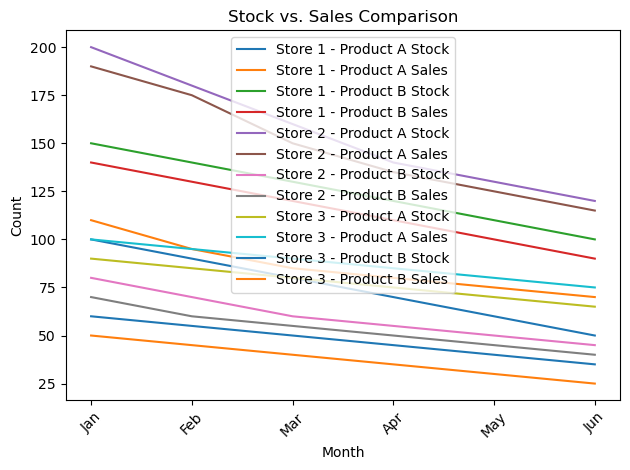

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the stock data as a dictionary
stock_data = {
    "StoreID": [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
    "Product": ["A", "A", "A", "A", "A", "A", "B", "B", "B", "B", "B", "B", "A", "A", "A", "A", "A", "A", "B", "B", "B", "B", "B", "B", "A", "A", "A", "A", "A", "A", "B", "B", "B", "B", "B", "B"],
    "Month": ["Jan", "Feb", "Mar", "Apr", "May", "Jun"] * 6,
    "Stock": [100, 90, 80, 70, 60, 50, 150, 140, 130, 120, 110, 100, 200, 180, 160, 140, 130, 120, 80, 70, 60, 55, 50, 45, 90, 85, 80, 75, 70, 65, 60, 55, 50, 45, 40, 35],
    "Sales": [110, 95, 85, 80, 75, 70, 140, 130, 120, 110, 100, 90, 190, 175, 150, 135, 125, 115, 70, 60, 55, 50, 45, 40, 100, 95, 90, 85, 80, 75, 50, 45, 40, 35, 30, 25]
}

# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame(stock_data)

# Display the DataFrame
# print(df)

# Group by StoreID and Product to calculate total stock and sales
summary = df.groupby(['StoreID', 'Product']).sum()

# Display the summary
# print(summary)

# Plotting the stock vs. sales for each product in each store
fig, ax = plt.subplots()

for store_id in df['StoreID'].unique():
    for product in df[df['StoreID'] == store_id]['Product'].unique():
        data = df[(df['StoreID'] == store_id) & (df['Product'] == product)]
        ax.plot(data['Month'], data['Stock'], label=f'Store {store_id} - Product {product} Stock')
        ax.plot(data['Month'], data['Sales'], label=f'Store {store_id} - Product {product} Sales')

ax.set_xlabel('Month')
ax.set_ylabel('Count')
ax.set_title('Stock vs. Sales Comparison')
ax.legend(loc='best')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [7]:
llm_chain = LLMChain(llm=llm, prompt=prompt)

prediction = llm_chain.run({"data": stock_data})

prediction

C:\Users\eDominer\AppData\Local\Temp\ipykernel_5388\3670138312.py:1: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  llm_chain = LLMChain(llm=llm, prompt=prompt)
C:\Users\eDominer\AppData\Local\Temp\ipykernel_5388\3670138312.py:3: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  prediction = llm_chain.run({"data": stock_data})


"Based on the provided data, I'll analyze the sales trends and product popularity to predict the stock needs for the next month. I'll also provide recommendations to move products from stores with lower demand to stores with higher demand.\n\n**Predictions:**\n\n1. StoreID: 1, Product: A, Predicted Stock: 65\n2. StoreID: 1, Product: B, Predicted Stock: 120\n3. StoreID: 2, Product: A, Predicted Stock: 80\n4. StoreID: 2, Product: B, Predicted Stock: 140\n5. StoreID: 3, Product: A, Predicted Stock: 75\n6. StoreID: 3, Product: B, Predicted Stock: 110\n\n**Recommendations:**\n\n1. Move 10 units of Product A from Store 3 to Store 1 (Store 1 has a higher demand for Product A, and Store 3 has a lower demand)\n2. Move 20 units of Product B from Store 2 to Store 1 (Store 1 has a higher demand for Product B, and Store 2 has a lower demand)\n\n**Analysis:**\n\nThe predictions are based on the following observations:\n\n* Product A has a consistent sales trend, with a slight decline over the past s

In [8]:
import markdown

html = markdown.markdown(prediction)


"<p>Based on the provided data, I'll analyze the sales trends and product popularity to predict the stock needs for the next month. I'll also provide recommendations to move products from stores with lower demand to stores with higher demand.</p>\n<p><strong>Predictions:</strong></p>\n<ol>\n<li>StoreID: 1, Product: A, Predicted Stock: 65</li>\n<li>StoreID: 1, Product: B, Predicted Stock: 120</li>\n<li>StoreID: 2, Product: A, Predicted Stock: 80</li>\n<li>StoreID: 2, Product: B, Predicted Stock: 140</li>\n<li>StoreID: 3, Product: A, Predicted Stock: 75</li>\n<li>StoreID: 3, Product: B, Predicted Stock: 110</li>\n</ol>\n<p><strong>Recommendations:</strong></p>\n<ol>\n<li>Move 10 units of Product A from Store 3 to Store 1 (Store 1 has a higher demand for Product A, and Store 3 has a lower demand)</li>\n<li>Move 20 units of Product B from Store 2 to Store 1 (Store 1 has a higher demand for Product B, and Store 2 has a lower demand)</li>\n</ol>\n<p><strong>Analysis:</strong></p>\n<p>The pre